# Imports

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import torch
import pandas as pd
import pathlib
from pathlib import Path
import json
import argparse
import sys


from CVAE_testbed.utils.greedy_encoding_plots import make_plot_encoding_greedy
from CVAE_testbed.utils.encoding_plots import make_plot_encoding
from CVAE_testbed.models.model_loader import ModelLoader
from CVAE_testbed.bin.CVAE_train import get_model
from CVAE_testbed.utils import str_to_object
from CVAE_testbed.utils.compare_plots import compare_plots_best_performing, plot_single_model_multiple_epoch, plot_multiple_model_multiple_epoch

# Specify path

In [3]:

path_save_dir = "/home/ritvik.vasan/Github/cookiecutter/CVAE_testbed/scripts/outputs/aics_159_features_beta_1_fix_test_size/"


# Plot results from Greedy search

In [4]:
stats = pd.read_csv(path_save_dir / Path('first_features.csv'))
stats_2 = pd.read_csv(path_save_dir / Path('selected_features.csv'))

(149, 159)

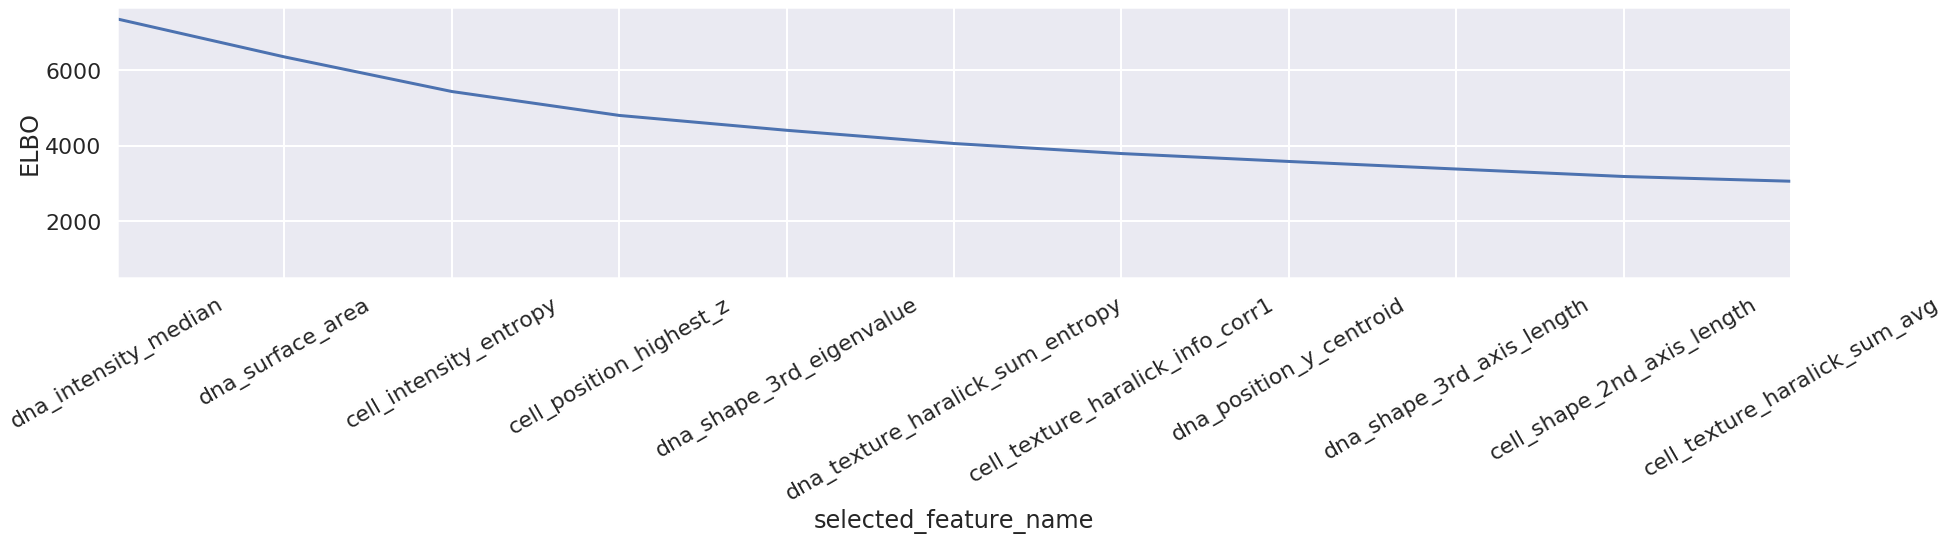

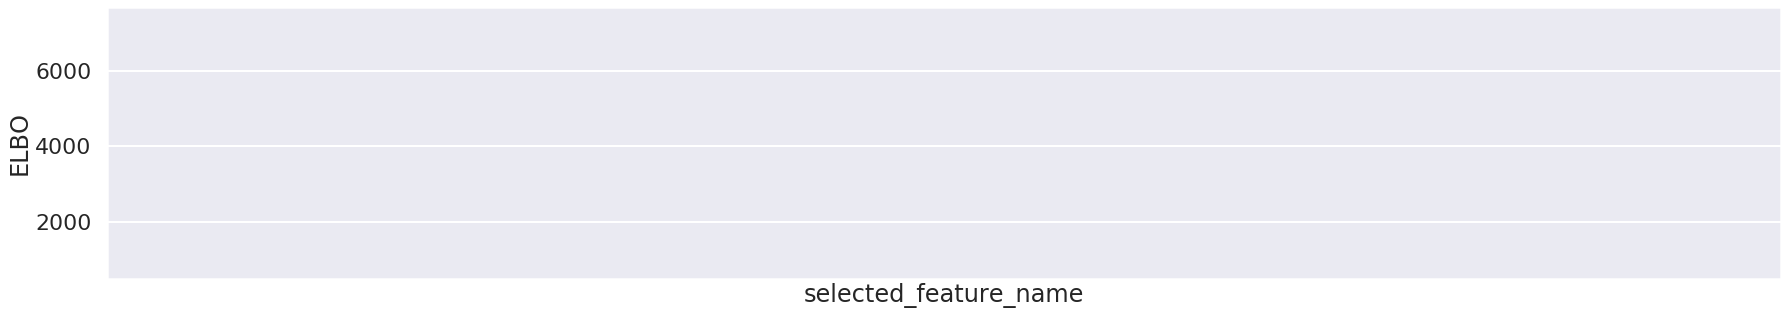

In [5]:
sns.set_context('poster')
fig, ax = plt.subplots(1,1,figsize = (30,5))
stats_2.sort_values(by='ELBO', ascending=False, inplace=True)
bar_fig = sns.lineplot(ax = ax,data=stats_2, x = 'selected_feature_name', y = 'ELBO', sort=False)
for item in bar_fig.get_xticklabels():
    item.set_rotation(30)
ax.set_xlim([0, 10])

sns.set_context('poster')
fig, ax = plt.subplots(1,1,figsize = (30,5))
stats_2.sort_values(by='ELBO', ascending=False, inplace=True)
bar_fig = sns.lineplot(ax = ax,data=stats_2, x = 'selected_feature_name', y = 'ELBO', sort=False)
for item in bar_fig.get_xticklabels():
    item.set_rotation(30)
ax.set_xlim([149, 159])

# Load training options

In [6]:
this_json = json.loads(open(path_save_dir + 'training_options.json').read())

In [7]:
this_json

{'batch_size': 64,
 'num_batches': 1000,
 'beta_vae': 1.0,
 'json_quilt_path': '/home/ritvik.vasan/test/',
 'binary_real_one_hot_parameters': {'binary_range': [0, 1],
  'binary_loss': 'BCE',
  'real_range': [1, 103],
  'real loss': 'MSE',
  'one_hot_range': [103, 159],
  'one_hot_loss': 'CE'},
 'config_path': '/home/ritvik.vasan/config.json',
 'C_vae': 0,
 'dataloader': 'CVAE_testbed.datasets.quilt_aics_features.QuiltAicsFeatures',
 'gpu_id': 0,
 'loss_fn': 'CVAE_testbed.losses.ELBO.combined_loss',
 'lr': 0.001,
 'model_fn': 'CVAE_testbed.models.CVAE_baseline.CVAE',
 'model_kwargs': {'x_dim': 159,
  'c_dim': 318,
  'enc_layers': [159, 256, 256, 256, 256, 256, 512, 512],
  'dec_layers': [512, 512, 256, 256, 256, 256, 256, 159]},
 'post_plot_kwargs': {'latent_space_colorbar': 'no'},
 'n_epochs': 30,
 'data_type': 'aics_features',
 'path_save_dir': './outputs/aics_159_features_beta_1_fix_test_size/'}

In [8]:
args = argparse.Namespace()
argparse_dict = vars(args)
argparse_dict.update(this_json)

In [9]:
device = (
    torch.device("cuda", args.gpu_id)
    if torch.cuda.is_available()
    else torch.device("cpu")
)

In [10]:
num_batches = this_json['num_batches']
batch_size = this_json['batch_size']
dataloader = this_json['dataloader']
model_kwargs = this_json['model_kwargs']
gpu_id = this_json['gpu_id']
model_fn = this_json['model_fn']

# Load model

In [ ]:
model = get_model(model_fn, model_kwargs).to(device)


In [ ]:
path_weights = path_save_dir / Path('weights.pt')
model.load_state_dict(torch.load(path_weights))
model.eval()

# Load data

In [ ]:
load_data = str_to_object(dataloader)

In [ ]:
model_kwargs

In [ ]:
P = None

Add this block for projected baseline data

In [ ]:
path_weights = path_save_dir / Path('projection_options.pt')
# model.load_state_dict(torch.load(path_weights))
# model.eval()
P = torch.load(path_weights)

this_dataloader = load_data(
                    args.num_batches, args.batch_size,args.model_kwargs, shuffle=False, P = P, train=False
                           )
feature_names = None

In [15]:
this_dataloader = load_data(
                    args.num_batches, args.batch_size, args.model_kwargs, shuffle=False, train=False
                        )

In [16]:
X_test, C_test, Cond_indices_test = this_dataloader.get_all_items()

Add this block for aics feature data

In [17]:
feature_names = this_dataloader.get_feature_names()

# Make encoding plots

In [18]:
stats = pd.read_csv(path_save_dir / Path('costs.csv'))

/home/ritvik.vasan/anaconda3/envs/env_2/lib/python3.7/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/ritvik.vasan/anaconda3/envs/env_2/lib/python3.7/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
/home/ritvik.vasan/anaconda3/envs/env_2/lib/python3.7/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


    selected_feature_number  \
0                      None   
1                        39   
2                        14   
3                        89   
4                        79   
5                        29   
6                        52   
7                       101   
8                        36   
9                        26   
10                       70   
11                       83   
12                       56   
13                       21   
14                        4   
15                       18   
16                       68   
17                       44   
18                       72   
19                       24   
20                        3   
21                       22   
22                       66   
23                       61   
24                       91   
25                        9   
26                        8   
27                       20   
28                        7   
29                       97   
..                      ...   
130     

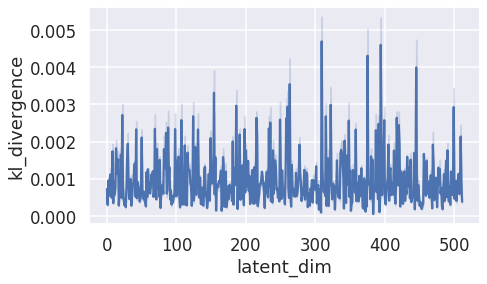

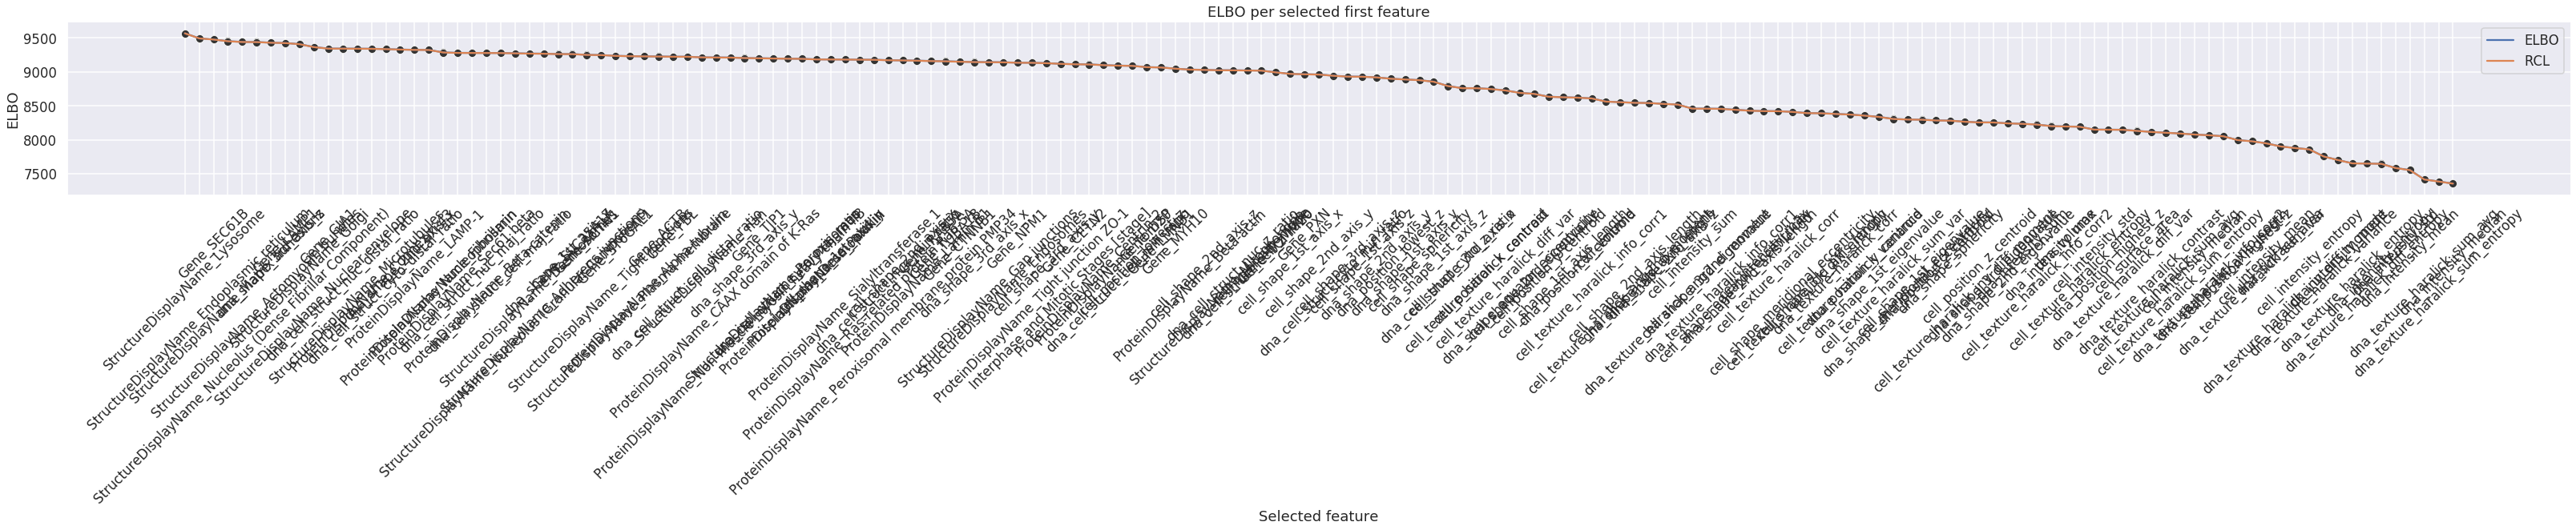

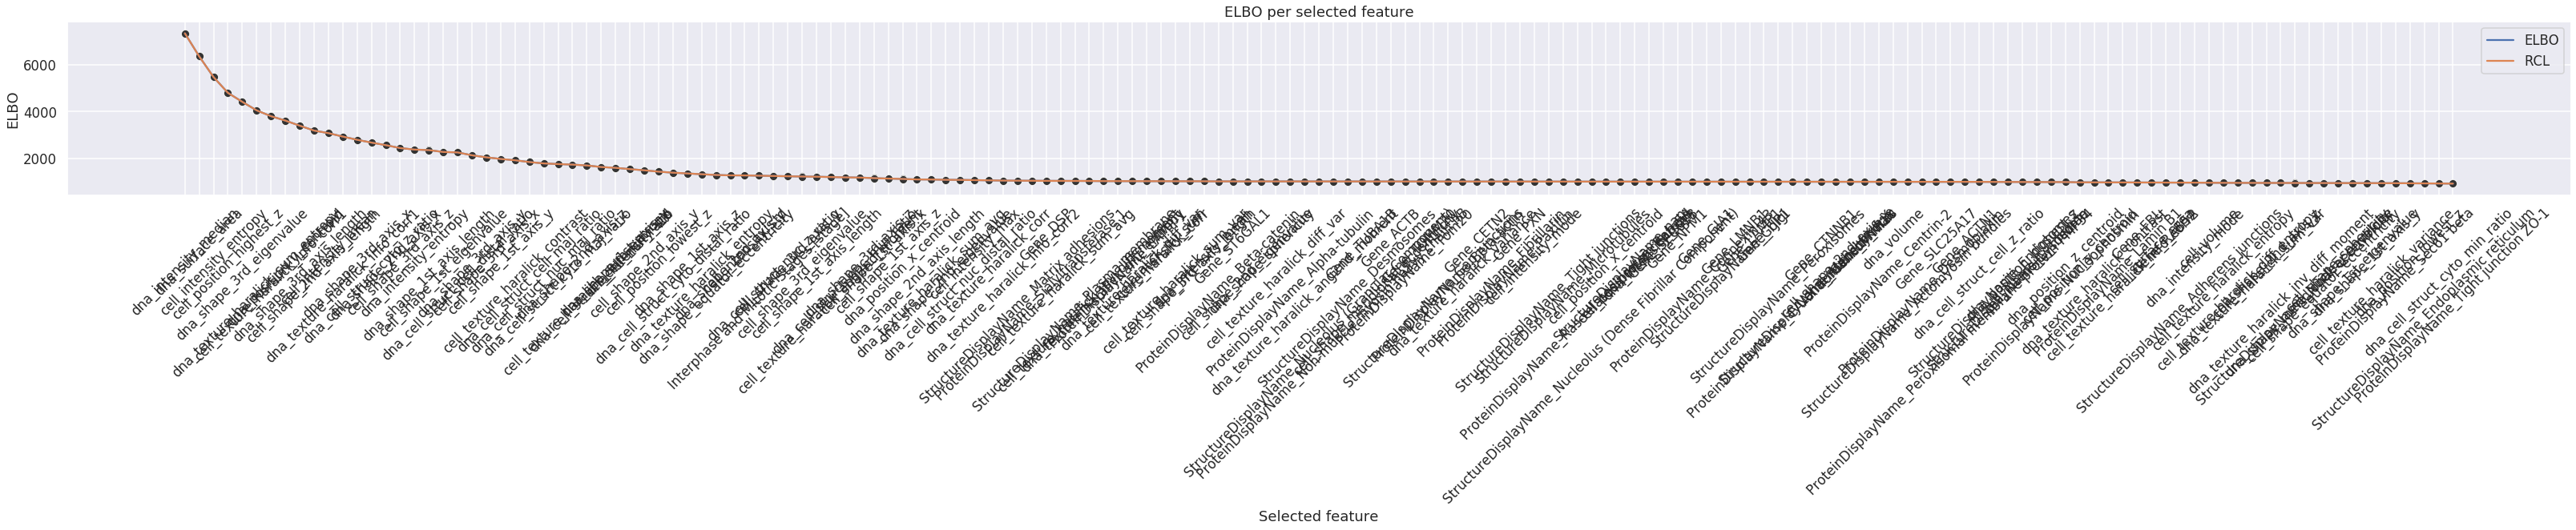

In [19]:
make_plot_encoding_greedy(args, model, stats, X_test.clone(), C_test.clone(), feature_names, save=False, proj_matrix=P)

/home/ritvik.vasan/anaconda3/envs/env_2/lib/python3.7/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/ritvik.vasan/anaconda3/envs/env_2/lib/python3.7/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


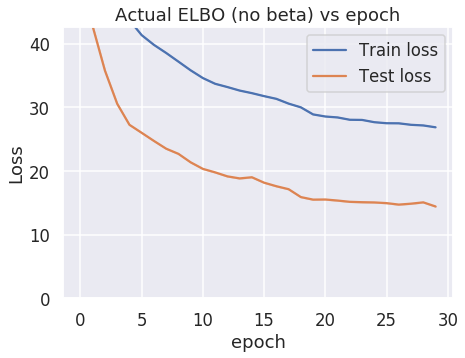

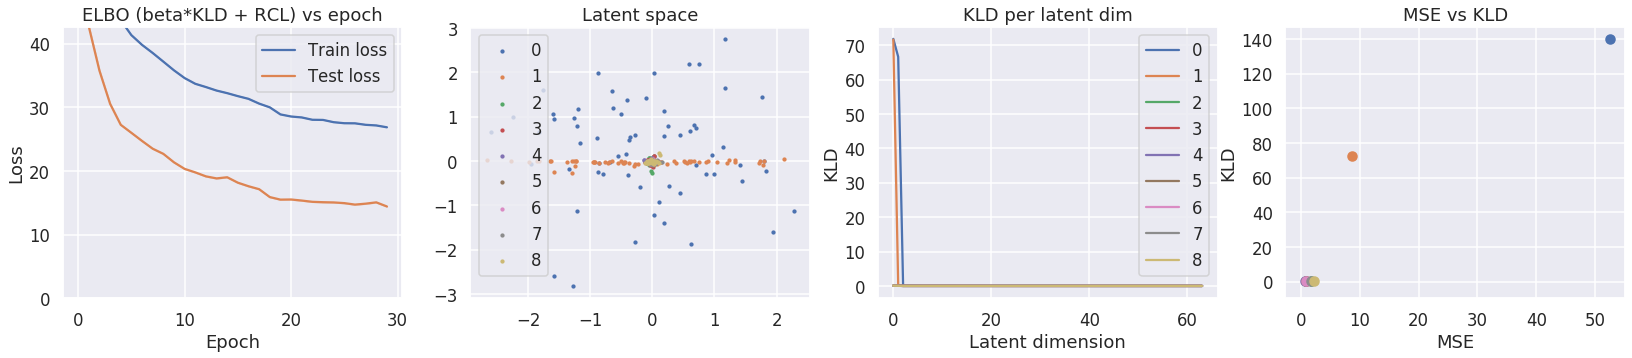

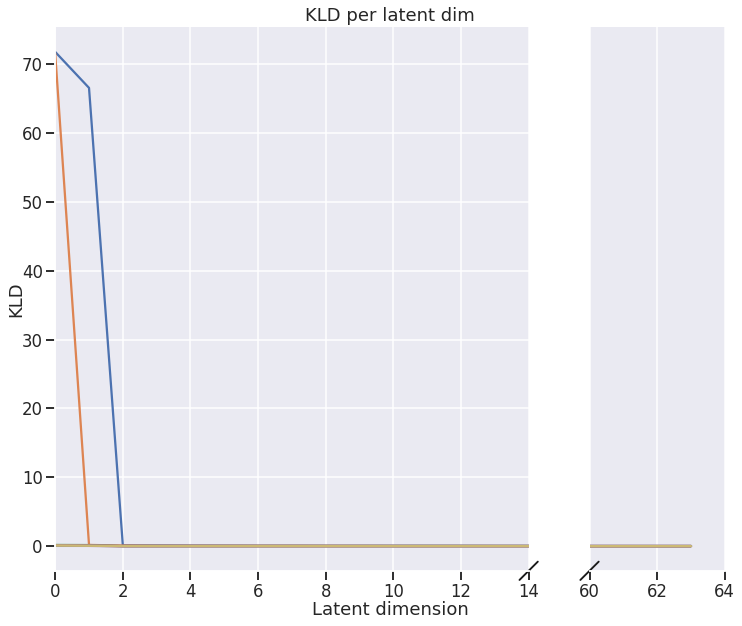

In [20]:
make_plot_encoding(args, model, stats, X_test, C_test, this_dataloader_color=None, save=False, proj_matrix=P)

In [40]:
this_dataloader

# Do PCA

In [41]:
from sklearn.decomposition import PCA
import numpy as np


In [42]:
pca = str_to_object(
        "CVAE_testbed.utils.pca.get_PCA_features"
        )

In [43]:
pca_dataframe = pca(args, this_dataloader, False)

In [44]:
pd.set_option('display.max_columns', 500)
pca_dataframe

,PC,Most_important_feature,PC_explained_variance,All_components
0,PC0,0,4.007166e+00,"[0.37226686, 0.33379245, 0.37226677, 0.3337925..."
1,PC1,1,3.935855e+00,"[0.3337925, -0.37226686, 0.33379254, -0.372266..."
2,PC2,1,3.781384e-14,"[0.00055296347, 0.7505222, 0.0013513565, -0.04..."
3,PC3,6,9.706970e-15,"[-0.053973086, 0.0018064547, -0.3894495, -0.00..."
4,PC4,0,4.799242e-16,"[0.86433375, -0.0018804967, -0.31355453, -0.00..."
5,PC5,7,1.257579e-16,"[-0.0031791313, -0.4308679, 0.0023377389, 0.44..."
6,PC6,3,2.468627e-17,"[0.001900215, -0.032595083, -0.003277734, 0.74..."
7,PC7,4,5.064184e-30,"[-1.2598309e-05, -7.580684e-08, -0.70710313, 1..."


# Make FID plot

torch.Size([8640, 159]) torch.Size([8640, 318])
[39.0, 14.0, 89.0, 79.0, 29.0, 52.0, 101.0, 36.0, 26.0, 70.0, 95.0, 16.0, 66.0, 68.0, 38.0, 22.0, 3.0, 21.0, 10.0, 91.0, 6.0, 61.0, 20.0, 9.0, 72.0, 47.0, 49.0, 33.0, 15.0, 88.0, 62.0, 8.0, 28.0, 94.0, 63.0, 1.0, 17.0, 30.0, 60.0, 11.0, 44.0, 35.0, 87.0, 69.0, 18.0, 46.0, 5.0, 78.0, 34.0, 2.0, 23.0, 48.0, 53.0, 67.0, 102.0, 59.0, 131.0, 57.0, 149.0, 93.0, 19.0, 4.0, 55.0, 140.0, 127.0, 86.0, 105.0, 100.0, 129.0, 153.0, 146.0, 54.0, 40.0, 64.0, 119.0, 7.0, 155.0, 112.0, 13.0, 75.0, 81.0, 107.0, 124.0, 73.0, 31.0, 133.0, 99.0, 125.0, 80.0, 128.0, 117.0, 25.0, 135.0, 113.0, 85.0, 116.0, 106.0, 143.0, 156.0, 150.0, 42.0, 137.0, 123.0, 147.0, 76.0, 139.0, 98.0, 12.0, 37.0, 121.0, 103.0, 130.0, 154.0, 120.0, 122.0, 111.0, 118.0, 132.0, 0.0]
534459
fid 503.35536950471135
543646
fid 428.54272549851254
552611
fid 425.7520760649554
561591
fid 419.8416152498429
571040
fid 415.452634636786
580239
fid 410.0300298324303
589733
fid 409.0718733128707
599

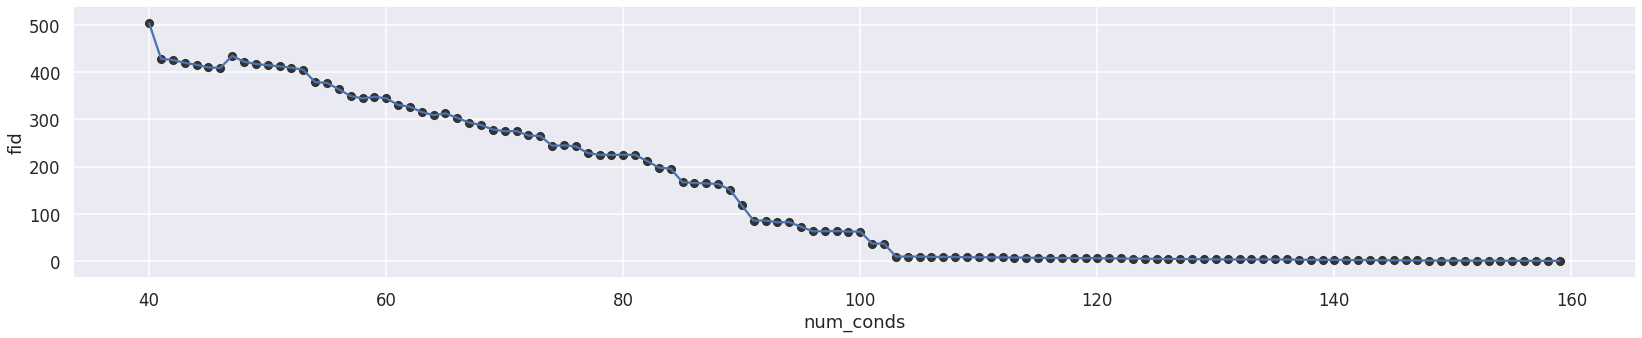

In [19]:
make_fid_plot = str_to_object(
        "CVAE_testbed.utils.FID_score.make_plot_FID"
        )

make_fid_plot(args, model, X_test, C_test, save=False)

In [21]:
X_test.size()

torch.Size([135, 64, 159])

In [22]:
C_test.size()

torch.Size([135, 64, 318])